In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15,C,0.4
0,1,1,-2,-3,-1,-3,39,10,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0
1,1,-4,-2,-6,-20,20,-1,-3,20,3,...,14,2,-2,0,23,21,-3,22,A,1
2,10,2,1,-7,-8,12,41,21,-14,3,...,2,1,2,-2,-8,-29,29,7,C,0
3,1,-3,-2,-6,1,0,10,-6,4,0,...,5,0,-3,-8,-11,-2,19,4,C,0
4,3,0,4,11,11,9,-21,-17,-20,-7,...,-5,-4,-5,-14,-25,-3,-34,-2,C,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8677 entries, 0 to 8676
Data columns (total 66 columns):
-47      8677 non-null int64
0        8677 non-null int64
-5       8677 non-null int64
-27      8677 non-null int64
-11      8677 non-null int64
-19      8677 non-null int64
-2       8677 non-null int64
-33      8677 non-null int64
37       8677 non-null int64
0.1      8677 non-null int64
-4       8677 non-null int64
-4.1     8677 non-null int64
5        8677 non-null int64
12       8677 non-null int64
-28      8677 non-null int64
16       8677 non-null int64
-19.1    8677 non-null int64
-5.1     8677 non-null int64
-3       8677 non-null int64
-10      8677 non-null int64
-12      8677 non-null int64
5.1      8677 non-null int64
41       8677 non-null int64
0.2      8677 non-null int64
12.1     8677 non-null int64
-9       8677 non-null int64
-2.1     8677 non-null int64
16.1     8677 non-null int64
-11.1    8677 non-null int64
-36      8677 non-null int64
14       8677 non-null 

In [4]:
df['C'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [5]:
df_class = pd.get_dummies(df['C'])

In [6]:
df_class.head()

,A,B,C,D
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [7]:
df_class.shape[0]

8677

In [8]:
new_df = df[[x for x in df if x != 'C']]
new_df.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,-23,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15,0.4
0,1,1,-2,-3,-1,-3,39,10,0,-1,...,17,-7,-2,1,6,-2,4,22,2,0
1,1,-4,-2,-6,-20,20,-1,-3,20,3,...,-7,14,2,-2,0,23,21,-3,22,1
2,10,2,1,-7,-8,12,41,21,-14,3,...,3,2,1,2,-2,-8,-29,29,7,0
3,1,-3,-2,-6,1,0,10,-6,4,0,...,-7,5,0,-3,-8,-11,-2,19,4,0
4,3,0,4,11,11,9,-21,-17,-20,-7,...,-11,-5,-4,-5,-14,-25,-3,-34,-2,0


In [9]:
new_df[['A','B','C','D']] = df_class
new_df.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,-3.2,4,-23.1,-68,15,0.4,A,B,C,D
0,1,1,-2,-3,-1,-3,39,10,0,-1,...,6,-2,4,22,2,0,0,0,1,0
1,1,-4,-2,-6,-20,20,-1,-3,20,3,...,0,23,21,-3,22,1,1,0,0,0
2,10,2,1,-7,-8,12,41,21,-14,3,...,-2,-8,-29,29,7,0,0,0,1,0
3,1,-3,-2,-6,1,0,10,-6,4,0,...,-8,-11,-2,19,4,0,0,0,1,0
4,3,0,4,11,11,9,-21,-17,-20,-7,...,-14,-25,-3,-34,-2,0,0,0,1,0


In [10]:
features = new_df[[x for x in new_df if x != '0.4']]
features.head(1)

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,-4.3,-3.2,4,-23.1,-68,15,A,B,C,D
0,1,1,-2,-3,-1,-3,39,10,0,-1,...,1,6,-2,4,22,2,0,0,1,0


In [11]:
target = new_df['0.4']
target.head()

0    0
1    1
2    0
3    0
4    0
Name: 0.4, dtype: int64

In [12]:
(target.shape[0], features.shape[0])

(8677, 8677)

In [13]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42
)

train_X.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,-4.3,-3.2,4,-23.1,-68,15,A,B,C,D
4081,3,17,-8,-4,2,-15,-1,-3,-2,16,...,-18,9,2,7,5,-1,0,0,0,1
7439,-7,-3,0,-2,4,0,-1,-5,0,-4,...,-1,-5,17,9,-1,0,1,0,0,0
8247,7,-13,1,4,16,63,6,0,-4,14,...,6,-7,-22,-18,-3,-9,0,0,0,1
1039,14,0,-2,-1,-15,-7,-2,-10,5,1,...,-2,1,5,3,1,-5,1,0,0,0
3105,8,0,-1,0,12,-23,2,4,-10,-5,...,0,-1,-5,-39,4,11,0,1,0,0


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_y.values.ravel())

knn.score(test_X, test_y)

0.684331797235023

In [15]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB().fit(train_X, train_y)
bernoulli.score(test_X, test_y)

1.0

^ clearly `BernoulliNB` does not work because not all features are binary

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(features)
scaled_features = pd.DataFrame(scaler.transform(features), columns = features.columns)

train_X_normalized, test_X_normalized, train_y, test_y = train_test_split(
    scaled_features,
    target,
    test_size = .2,
    random_state = 42
)

train_X_normalized

multinomial = MultinomialNB().fit(train_X_normalized, train_y)
multinomial.score(test_X_normalized, test_y)

1.0

^ clearly `MultinomialNB` does not work because we have binary values in the df

In [17]:
scaled_features_no_C = scaled_features[[x for x in scaled_features if x != 'A' and x != 'B' and x != 'C' and x != 'D']]
scaled_features_no_C.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,20,-23,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15
0,0.515419,0.541237,0.492063,0.553846,0.563380,0.477912,0.654902,0.543307,0.464135,0.585253,...,0.713725,0.614407,0.427350,0.532751,0.626667,0.640,0.533708,0.517647,0.588235,0.510121
1,0.515419,0.515464,0.492063,0.530769,0.474178,0.570281,0.498039,0.492126,0.548523,0.603687,...,0.478431,0.512712,0.517094,0.550218,0.586667,0.592,0.674157,0.584314,0.490196,0.591093
2,0.555066,0.546392,0.539683,0.523077,0.530516,0.538153,0.662745,0.586614,0.405063,0.603687,...,0.415686,0.555085,0.465812,0.545852,0.640000,0.576,0.500000,0.388235,0.615686,0.530364
3,0.515419,0.520619,0.492063,0.530769,0.572770,0.489960,0.541176,0.480315,0.481013,0.589862,...,0.466667,0.512712,0.478632,0.541485,0.573333,0.528,0.483146,0.494118,0.576471,0.518219
4,0.524229,0.536082,0.587302,0.661538,0.619718,0.526104,0.419608,0.437008,0.379747,0.557604,...,0.250980,0.495763,0.435897,0.524017,0.546667,0.480,0.404494,0.490196,0.368627,0.493927


In [18]:
train_X_normalized, test_X_normalized, train_y, test_y = train_test_split(
    scaled_features_no_C,
    target,
    test_size = .2,
    random_state = 42
)

# train_X_normalized

multinomial = MultinomialNB().fit(train_X_normalized, train_y)
multinomial.score(test_X_normalized, test_y)

0.22350230414746544

In [33]:
from sklearn.naive_bayes import GaussianNB

guassian = GaussianNB().fit(train_X, train_y)
guassian.score(test_X, test_y)

1.0

^ Clearly Guassian does not work because features are not floats (continous)

Maybe the amount of features we have is making most models overfit the data. We will now attempt to fix this problem.

In [19]:
df.shape[1]

66

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

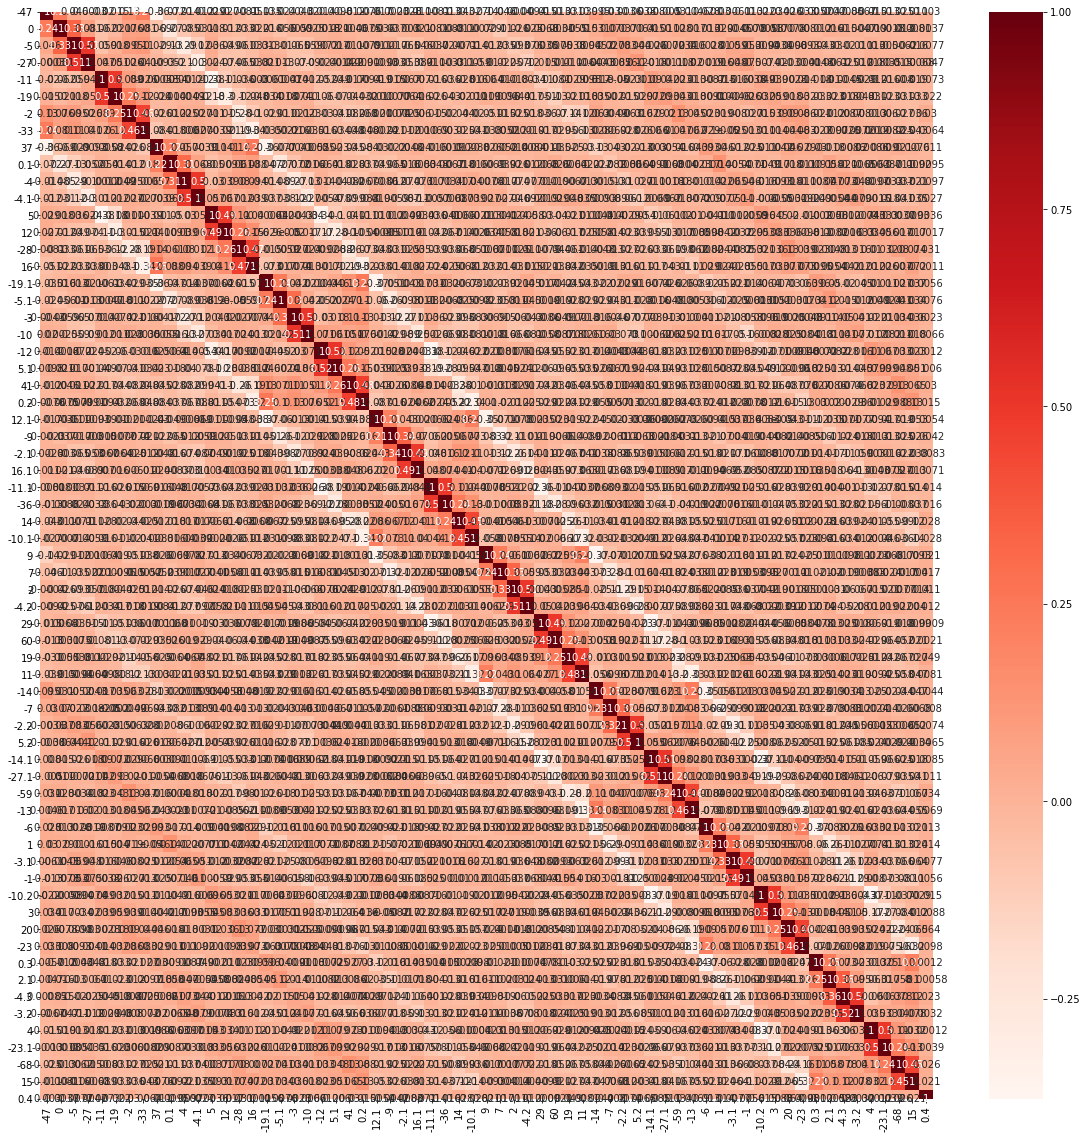

In [21]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
for i in cor:
#     print(i)
    #Correlation with output variable
    cor_target = abs(cor[i])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.5]
    print(relevant_features)

-47    1.0
Name: -47, dtype: float64
0    1.0
Name: 0, dtype: float64
-5     1.000000
-27    0.509942
Name: -5, dtype: float64
-5     0.509942
-27    1.000000
Name: -27, dtype: float64
-11    1.000000
-19    0.502534
Name: -11, dtype: float64
-11    0.502534
-19    1.000000
Name: -19, dtype: float64
-2    1.0
Name: -2, dtype: float64
-33    1.0
Name: -33, dtype: float64
37    1.0
Name: 37, dtype: float64
0.1    1.0
Name: 0.1, dtype: float64
-4      1.000000
-4.1    0.504048
Name: -4, dtype: float64
-4      0.504048
-4.1    1.000000
Name: -4.1, dtype: float64
5    1.0
Name: 5, dtype: float64
12    1.0
Name: 12, dtype: float64
-28    1.0
Name: -28, dtype: float64
16    1.0
Name: 16, dtype: float64
-19.1    1.0
Name: -19.1, dtype: float64
-5.1    1.0
Name: -5.1, dtype: float64
-3     1.000000
-10    0.514302
Name: -3, dtype: float64
-3     0.514302
-10    1.000000
Name: -10, dtype: float64
-12    1.000000
5.1    0.518967
Name: -12, dtype: float64
-12    0.518967
5.1    1.000000
Name: 5.1,

In [36]:
#Correlation with output variable
cor_target = abs(cor['0.4'])
#Selecting highly correlated features
irrelevant_features = cor_target[cor_target<0.01]
print(irrelevant_features.count())

40


In [37]:
df_clean = df.copy()

In [38]:
df_clean.drop(columns = irrelevant_features.index, inplace = True)

In [39]:
df_clean.shape[1]

26

In [40]:
df_clean_prep = df_clean[[x for x in df_clean if x != 'C']]
df_clean_prep[['A','B','C','D']] = df_class

features = df_clean_prep[[x for x in df_clean_prep if x != '0.4']]
target = df_clean_prep['0.4']

(target.shape[0], features.shape[0])

(8677, 8677)

In [41]:
train_X, test_X, train_y, test_y = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42
)

train_X.head()

,-19,-2,37,-28,41,0.2,-11.1,-36,14,-10.1,...,1,-10.2,20,-4.3,-68,15,A,B,C,D
4081,-15,-1,-2,1,-3,-6,1,-12,-5,0,...,22,4,-1,-18,5,-1,0,0,0,1
7439,0,-1,0,-3,1,-3,28,45,-1,-6,...,7,-44,-3,-1,-1,0,1,0,0,0
8247,63,6,-4,8,-6,1,-9,-34,-7,2,...,-9,-24,-2,6,-3,-9,0,0,0,1
1039,-7,-2,5,0,0,-4,11,1,-1,9,...,7,-78,-4,-2,1,-5,1,0,0,0
3105,-23,2,-10,-12,0,-15,9,28,9,2,...,0,14,-1,0,4,11,0,1,0,0


In [42]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_y.values.ravel())

knn.score(test_X, test_y)

0.6514976958525346

In [43]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(features)
scaled_features = pd.DataFrame(scaler.transform(features), columns = features.columns)

In [44]:
scaled_features_no_C = scaled_features[[x for x in scaled_features if x != 'A' and x != 'B' and x != 'C' and x != 'D']]
scaled_features_no_C.head()

,-19,-2,37,-28,41,0.2,-11.1,-36,14,-10.1,...,19,-27.1,-59,-6,1,-10.2,20,-4.3,-68,15
0,0.477912,0.654902,0.464135,0.509804,0.396078,0.500000,0.553991,0.494118,0.196078,0.472441,...,0.376471,0.551440,0.772549,0.570833,0.616915,0.589372,0.713725,0.626667,0.588235,0.510121
1,0.570281,0.498039,0.548523,0.509804,0.494118,0.485849,0.427230,0.549020,0.505882,0.496063,...,0.498039,0.255144,0.498039,0.479167,0.567164,0.777778,0.478431,0.586667,0.490196,0.591093
2,0.538153,0.662745,0.405063,0.356863,0.384314,0.509434,0.544601,0.831373,0.705882,0.531496,...,0.388235,0.497942,0.592157,0.533333,0.587065,0.526570,0.415686,0.640000,0.615686,0.530364
3,0.489960,0.541176,0.481013,0.607843,0.529412,0.457547,0.521127,0.541176,0.486275,0.480315,...,0.439216,0.489712,0.482353,0.420833,0.592040,0.492754,0.466667,0.573333,0.576471,0.518219
4,0.526104,0.419608,0.379747,0.431373,0.784314,0.504717,0.483568,0.498039,0.466667,0.531496,...,0.560784,0.485597,0.474510,0.504167,0.592040,0.512077,0.250980,0.546667,0.368627,0.493927


In [45]:
multinomial = MultinomialNB().fit(train_X_normalized, train_y)
multinomial.score(test_X_normalized, test_y)

0.22350230414746544

lets use `RobustScaler()` instead

In [46]:
from sklearn.preprocessing import RobustScaler

In [52]:
transformer = RobustScaler().fit(new_df)
rb_scaler = pd.DataFrame(transformer.transform(new_df), columns = new_df.columns)

In [53]:
rb_scaler.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,-3.2,4,-23.1,-68,15,0.4,A,B,C,D
0,0.1250,0.285714,-0.2,-0.285714,-0.05,-0.071429,4.0,0.785714,0.066667,0.000000,...,1.000000,-0.10,0.185185,2.555556,0.214286,-1.0,0.0,0.0,1.0,0.0
1,0.1250,-0.428571,-0.2,-0.714286,-1.00,0.750000,0.0,-0.142857,1.400000,0.571429,...,0.142857,1.15,0.814815,-0.222222,1.642857,-0.5,1.0,0.0,0.0,0.0
2,0.6875,0.428571,0.4,-0.857143,-0.40,0.464286,4.2,1.571429,-0.866667,0.571429,...,-0.142857,-0.40,-1.037037,3.333333,0.571429,-1.0,0.0,0.0,1.0,0.0
3,0.1250,-0.285714,-0.2,-0.714286,0.05,0.035714,1.1,-0.357143,0.333333,0.142857,...,-1.000000,-0.55,-0.037037,2.222222,0.357143,-1.0,0.0,0.0,1.0,0.0
4,0.2500,0.142857,1.0,1.714286,0.55,0.357143,-2.0,-1.142857,-1.266667,-0.857143,...,-1.857143,-1.25,-0.074074,-3.666667,-0.071429,-1.0,0.0,0.0,1.0,0.0


In [60]:
features = rb_scaler[[x for x in rb_scaler if x != 'A' and x != 'B' and x != 'C' and x != 'D' and x != '0.4']]
features.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,20,-23,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15
0,0.1250,0.285714,-0.2,-0.285714,-0.05,-0.071429,4.0,0.785714,0.066667,0.000000,...,6.111111,1.384615,-0.400000,-0.142857,0.4,1.000000,-0.10,0.185185,2.555556,0.214286
1,0.1250,-0.428571,-0.2,-0.714286,-1.00,0.750000,0.0,-0.142857,1.400000,0.571429,...,-0.555556,-0.461538,1.000000,0.428571,-0.2,0.142857,1.15,0.814815,-0.222222,1.642857
2,0.6875,0.428571,0.4,-0.857143,-0.40,0.464286,4.2,1.571429,-0.866667,0.571429,...,-2.333333,0.307692,0.200000,0.285714,0.6,-0.142857,-0.40,-1.037037,3.333333,0.571429
3,0.1250,-0.285714,-0.2,-0.714286,0.05,0.035714,1.1,-0.357143,0.333333,0.142857,...,-0.888889,-0.461538,0.400000,0.142857,-0.4,-1.000000,-0.55,-0.037037,2.222222,0.357143
4,0.2500,0.142857,1.0,1.714286,0.55,0.357143,-2.0,-1.142857,-1.266667,-0.857143,...,-7.000000,-0.769231,-0.266667,-0.428571,-0.8,-1.857143,-1.25,-0.074074,-3.666667,-0.071429


In [61]:
train_X, test_X, train_y, test_y = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42
)

train_X.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,20,-23,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15
4081,0.2500,2.571429,-1.4,-0.428571,0.10,-0.500000,0.0,-0.142857,-0.066667,2.428571,...,0.000000,-0.846154,-3.200000,-9.285714,-3.4,1.428571,0.10,0.296296,0.666667,0.000000
7439,-0.3750,-0.285714,0.2,-0.142857,0.20,0.035714,0.0,-0.285714,0.066667,-0.428571,...,-0.222222,0.461538,0.466667,0.428571,0.0,-0.571429,0.85,0.370370,0.000000,0.071429
8247,0.5000,-1.714286,0.4,0.714286,0.80,2.285714,0.7,0.071429,-0.200000,2.142857,...,-0.111111,-0.153846,0.066667,3.428571,1.4,-0.857143,-1.10,-0.629630,-0.222222,-0.571429
1039,0.9375,0.142857,-0.2,0.000000,-0.75,-0.214286,-0.1,-0.642857,0.400000,0.285714,...,-0.333333,0.538462,-0.200000,-0.285714,-0.2,0.285714,0.25,0.148148,0.222222,-0.285714
3105,0.5625,0.142857,0.0,0.142857,0.60,-0.785714,0.3,0.357143,-0.600000,-0.571429,...,0.000000,0.307692,1.800000,0.571429,0.2,0.000000,-0.25,-1.407407,0.555556,0.857143


In [62]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_y.values.ravel())

knn.score(test_X, test_y)

0.7759216589861752

In [56]:
test_df = pd.read_csv('test.csv')

In [71]:
test_df.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15,A,0.4
0,1,1,-2,-3,-1.0,-3.0,39.0,10.0,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0
1,1,-4,-2,-6,-20.0,20.0,-1.0,-3.0,20,3,...,14,2,-2,0,23,21,-3,22,B,1
2,10,2,1,-7,-8.0,12.0,41.0,21.0,-14,3,...,2,1,2,-2,-8,-29,29,7,B,0
3,1,-3,-2,-6,1.0,0.0,10.0,-6.0,4,0,...,5,0,-3,-8,-11,-2,19,4,C,0
4,3,0,4,11,11.0,9.0,-21.0,-17.0,-20,-7,...,-5,-4,-5,-14,-25,-3,-34,-2,D,0


In [75]:
test_df[[x for x in test_df if x != 'A']].columns == df[[x for x in df if x != 'C']].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [99]:
test_df_no_C = test_df[[x for x in test_df if x != 'A']]

transformer_test_df = RobustScaler().fit(test_df_no_C)
rb_scaler_test = pd.DataFrame(transformer_test_df.transform(test_df_no_C), columns = test_df_no_C.columns)

train_X = rb_scaler[[x for x in rb_scaler if x != 'A' and x != 'B' and x != 'C' and x != 'D' and x != '0.4']]
train_y = df['0.4']

test_X = rb_scaler_test[[x for x in rb_scaler_test if x != '0.4']]
test_y = test_df['0.4']

In [100]:
train_X.head()

,-47,0,-5,-27,-11,-19,-2,-33,37,0.1,...,20,-23,0.3,2.1,-4.3,-3.2,4,-23.1,-68,15
0,0.1250,0.285714,-0.2,-0.285714,-0.05,-0.071429,4.0,0.785714,0.066667,0.000000,...,6.111111,1.384615,-0.400000,-0.142857,0.4,1.000000,-0.10,0.185185,2.555556,0.214286
1,0.1250,-0.428571,-0.2,-0.714286,-1.00,0.750000,0.0,-0.142857,1.400000,0.571429,...,-0.555556,-0.461538,1.000000,0.428571,-0.2,0.142857,1.15,0.814815,-0.222222,1.642857
2,0.6875,0.428571,0.4,-0.857143,-0.40,0.464286,4.2,1.571429,-0.866667,0.571429,...,-2.333333,0.307692,0.200000,0.285714,0.6,-0.142857,-0.40,-1.037037,3.333333,0.571429
3,0.1250,-0.285714,-0.2,-0.714286,0.05,0.035714,1.1,-0.357143,0.333333,0.142857,...,-0.888889,-0.461538,0.400000,0.142857,-0.4,-1.000000,-0.55,-0.037037,2.222222,0.357143
4,0.2500,0.142857,1.0,1.714286,0.55,0.357143,-2.0,-1.142857,-1.266667,-0.857143,...,-7.000000,-0.769231,-0.266667,-0.428571,-0.8,-1.857143,-1.25,-0.074074,-3.666667,-0.071429


In [104]:
test_X_filled_nan = test_X.fillna(0)
test_X_filled_nan.isna().sum()

-47      0
0        0
-5       0
-27      0
-11      0
        ..
-3.2     0
4        0
-23.1    0
-68      0
15       0
Length: 64, dtype: int64

In [105]:
test_X_no_nan = test_X.dropna(how = 'any')
test_X_no_nan.isna().sum()

-47      0
0        0
-5       0
-27      0
-11      0
        ..
-3.2     0
4        0
-23.1    0
-68      0
15       0
Length: 64, dtype: int64

In [106]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_y)

knn.score(test_X_filled_nan, test_y)

0.8712904301433811

In [107]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_y)

knn.score(test_X_no_nan, test_y)

ValueError: Found input variables with inconsistent numbers of samples: [2999, 2988]